# Esquema de Pirâmide
<!-- O esquema de pirâmide atrai diversas pessoas que querem ganhar dinheiro fácil e a curto prazo. -->

Análise e predição de lucro em um esquema de pirâmide com o uso de regreção linear

In [38]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np

## Data understanding

Os [dados utilizados](https://www.kaggle.com/datasets/pulkit21aug/pyramid-scheme-profit-or-loss)
nesse trabalho correspondem a um `.csv` de 500 linhas com as seguintes colunas:

- `cost_price`: valor do custo inserido na pirâmide
- `profit_markup`: Quantidade de vezes que houve um “profit” = lucro.
- `depth_of_tree`: Quantidade de pessoas na pirâmide
- `sales_commission`: Valor recebido de comissão na pirâmide
- `profit`: Lucro ganho na pirâmide


In [39]:
df = pd.read_csv('./pyramid_scheme.csv')
df

,cost_price,profit_markup,depth_of_tree,sales_commission,profit
0,3500,2,21,1000,-16500
1,3500,2,26,1000,-21500
2,3500,2,23,1000,-18500
3,3500,3,12,1000,-4000
4,3500,2,12,1000,-7500
...,...,...,...,...,...
495,3500,5,12,1000,3000
496,3500,3,8,1000,0
497,3500,2,10,1000,-5500
498,3500,4,21,1000,-9500


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   cost_price        500 non-null    int64
 1   profit_markup     500 non-null    int64
 2   depth_of_tree     500 non-null    int64
 3   sales_commission  500 non-null    int64
 4   profit            500 non-null    int64
dtypes: int64(5)
memory usage: 19.7 KB


- Remoção da coluna lucro, do data frame para torna-la nosso valor alvo

In [41]:
target = df[["profit"]]
df.drop("profit", axis=1, inplace=True)

- Separação dos dados de teste e treinamento

In [42]:
x_train, x_test, y_train, y_test = train_test_split(df, target, test_size=0.2)

- Criação de um moledo de regração linear para comparar cada uma das colunas (x)
em relação a coluna alvo (y = lucro)
- Treinamento do modelo
- Teste do modelo
- Criação de um gráfico comparando o resultado esperado dos testes (pontos em azul)
e o resultado obtido pelo modelo (linha em vermelho)

cost_price 	score	 -0.0002608211675008132


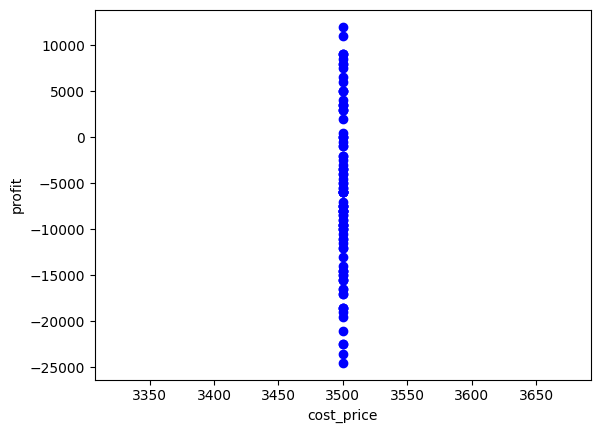

profit_markup 	score	 0.22614618922039453


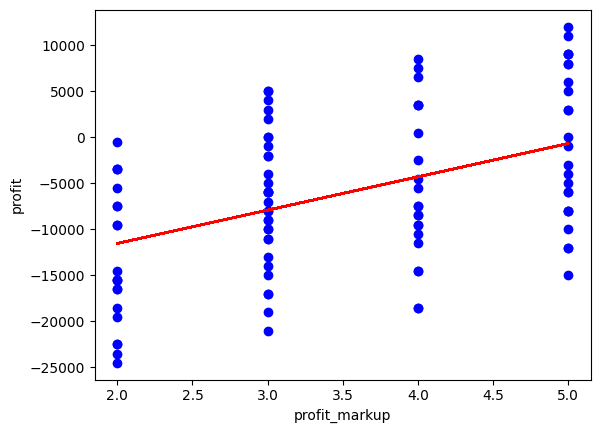

depth_of_tree 	score	 0.8094803015362638


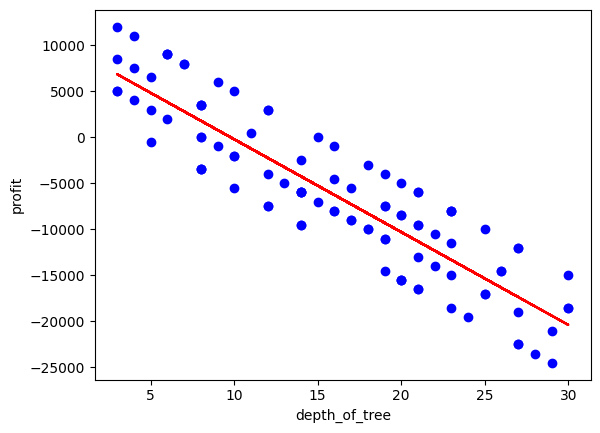

sales_commission 	score	 -0.0002608211675008132


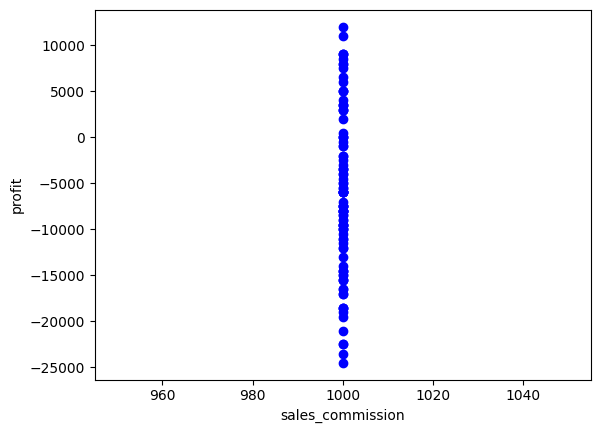

In [43]:
for col in df.columns:
  model = LinearRegression()
  model.fit(x_train[[col]], y_train)

  score = model.score(x_test[[col]], y_test)
  y_pred = model.predict(x_test[[col]])

  plt.scatter(x_test[[col]], y_test, color="blue")
  plt.plot(x_test[[col]], y_pred, color="red")

  plt.ylabel('profit')
  plt.xlabel(col)

  print(col, "\tscore\t", score)
  plt.show()

Tendo em vista os resultados do modelos criados anteriormente, podemos 
observar a correlação negativa entre `depth_of_tree` e `profit`, ou seja,
quanto maior o número de pessoas na pirâmide menor o lucro.

Com isso tem-se correlação forte para criar um modelo de regreção linear:

In [44]:
model = LinearRegression()
model.fit(x_train[["depth_of_tree"]], y_train)

score = model.score(x_test[["depth_of_tree"]], y_test)
print("Coeficiente de determinação: %.2f" % score)

Coeficiente de determinação: 0.81


In [45]:
y_pred = model.predict(x_test[["depth_of_tree"]])
# Cálculo de MSE (Mean Squared Error), MAE (Mean Absolute Error) e RMSE (Root Mean Square Error)
print('MAE: \t %.2f' % metrics.mean_absolute_error(y_test, y_pred))
print('MSE: \t %.2f' % metrics.mean_squared_error(y_test, y_pred))
print('RMSE:\t %.2f' % np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 	 3359.91
MSE: 	 14317036.17
RMSE:	 3783.79


In [46]:
x_train, x_test, y_train, y_test = train_test_split(df[["depth_of_tree"]], target, test_size=0.2)

,intercepts,training_accuracy,test_accuracy
0,True,0.809278,0.816159
1,False,0.565496,0.560404


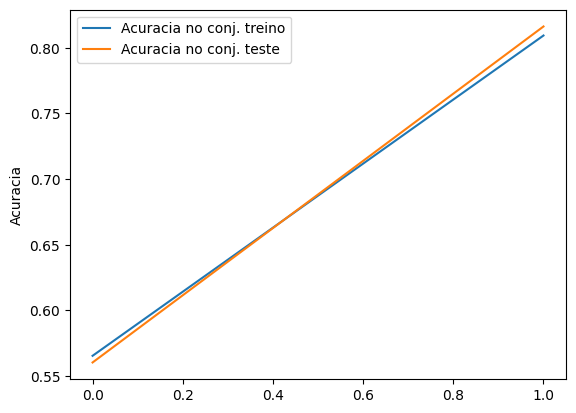

In [47]:
training_accuracy = []
test_accuracy = []

intercepts= [True, False]

for interception in intercepts:
  model = LinearRegression(fit_intercept=interception)
  model.fit(x_train,y_train)
  training_accuracy.append(model.score(x_train, y_train))
  test_accuracy.append(model.score(x_test, y_test))

plt.plot(intercepts, training_accuracy, label='Acuracia no conj. treino')
plt.plot(intercepts, test_accuracy, label='Acuracia no conj. teste')
plt.ylabel('Acuracia')
plt.legend()

pd.DataFrame({"intercepts": intercepts, "training_accuracy": training_accuracy, "test_accuracy":test_accuracy })

In [48]:
model = LinearRegression()
model.fit(x_train, y_train)

score = model.score(x_test, y_test)
print("Coeficiente de determinação: %.2f" % score)

Coeficiente de determinação: 0.82


In [52]:
y_pred = model.predict(x_test)
# Cálculo de MSE (Mean Squared Error), MAE (Mean Absolute Error) e RMSE (Root Mean Square Error)
print('MAE: \t %.2f' % metrics.mean_absolute_error(y_test, y_pred))
print('MSE: \t %.2f' % metrics.mean_squared_error(y_test, y_pred))
print('RMSE:\t %.2f' % np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 	 3589.74
MSE: 	 15916456.13
RMSE:	 3989.54


In [49]:
test_sample = x_test.head(1)
test_sample

,depth_of_tree
66,15


In [50]:
result_test_sample = y_test.head(1)
result_test_sample

,profit
66,-7000


In [51]:
model.predict(test_sample)

array([[-5173.57176496]])